In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('./HN_P2C.csv')

/var/folders/6g/jsvgykrx6q53bm52dz7x1ldm0000gn/T/ipykernel_53541/1672303896.py:1: DtypeWarning: Columns (12,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./HN_P2C.csv')


In [ ]:
df.info(verbose=True)

In [ ]:
df.head()

**Check the frequencies of each type in the CLabel Column**

In [30]:
df['CLabel'] = df['CLabel'].fillna('<missing>')

c_label_counts = df['CLabel'].value_counts()

plt.figure(figsize=(10, 6))
c_label_counts.plot(kind='bar')
plt.title('Frequency of Each Category in CLabel')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

In [9]:
print(df['CLabel'].unique())

['ignore' '<missing>' 'Healthy' 'Cancer' 'LGD' 'HGD']


In [31]:
print(df['Anatomy'].unique())

In [32]:
print(df.iloc[:, 77:95].dtypes)
df_new = df[df['CLabel'].isin(['Healthy', 'Cancer'])]
df_new.to_csv('df_new.csv', index=False)
df_new.head()

In [14]:
print(df_new.columns)

Index(['Case', 'Run', 'Anatomy', 'ScanContext', 'Instrument', 'Setup',
       'Diagnosis', 'HPVstatus', 'TobbacoStatus', 'OccultPrimary',
       ...
       'Phasor_GH3_ch2', 'Phasor_SH3_ch2', 'Phasor_GH3_ch3', 'Phasor_SH3_ch3',
       'WLI_distance_fromMargin', 'WLI_frame_n', 'WLI_x_coord', 'WLI_y_coord',
       'Label', 'CLabel'],
      dtype='object', length=101)


In [15]:
print(df_new.columns)
num_rows_df = df.shape[0]
num_rows_df_new = df_new.shape[0]

print("Number of rows in df:", num_rows_df)
print("Number of rows in df_new:", num_rows_df_new)

Index(['Case', 'Run', 'Anatomy', 'ScanContext', 'Instrument', 'Setup',
       'Diagnosis', 'HPVstatus', 'TobbacoStatus', 'OccultPrimary',
       ...
       'Phasor_GH3_ch2', 'Phasor_SH3_ch2', 'Phasor_GH3_ch3', 'Phasor_SH3_ch3',
       'WLI_distance_fromMargin', 'WLI_frame_n', 'WLI_x_coord', 'WLI_y_coord',
       'Label', 'CLabel'],
      dtype='object', length=101)
Number of rows in df: 202285
Number of rows in df_new: 128459


In [18]:
df_new.head()

Case  Run          Anatomy ScanContext Instrument    Setup Diagnosis  \
1369     2   10  Palatine Tonsil     In Vivo         V4  TORS Si    Benign   
1370     2   10  Palatine Tonsil     In Vivo         V4  TORS Si    Benign   
1371     2   10  Palatine Tonsil     In Vivo         V4  TORS Si    Benign   
1372     2   10  Palatine Tonsil     In Vivo         V4  TORS Si    Benign   
1373     2   10  Palatine Tonsil     In Vivo         V4  TORS Si    Benign   

     HPVstatus               TobbacoStatus OccultPrimary  ... Phasor_GH3_ch2  \
1369  Positive  Reformed Smoker > 15 Years            No  ...       0.393516   
1370  Positive  Reformed Smoker > 15 Years            No  ...       0.406394   
1371  Positive  Reformed Smoker > 15 Years            No  ...       0.394635   
1372  Positive  Reformed Smoker > 15 Years            No  ...       0.391027   
1373  Positive  Reformed Smoker > 15 Years            No  ...       0.393519   

      Phasor_SH3_ch2 Phasor_GH3_ch3  Phasor_SH3_ch3  WLI_distance_fromMargin  \
1369        0.367399       0.399271        0.372236                      0.0   
1370        0.360772       0.419315        0.351961                      0.0   
1371        0.361073       0.421770        0.381921                      0.0   
1372        0.366702       0.438035        0.366825                      0.0   
1373        0.355304       0.380721        0.365795                      0.0   

      WLI_frame_n  WLI_x_coord WLI_y_coord Label   CLabel  
1369            3          815         644    20  Healthy  
1370            4          813         642    20  Healthy  
1371            5          814         626    20  Healthy  
1372            6          814         626    20  Healthy  
1373            7          818         611    20  Healthy  

[5 rows x 101 columns]

In [19]:
df_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 128459 entries, 1369 to 202269
Data columns (total 101 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    Case                                          int64  
 1    Run                                           int64  
 2    Anatomy                                       object 
 3    ScanContext                                   object 
 4    Instrument                                    object 
 5    Setup                                         object 
 6    Diagnosis                                     object 
 7    HPVstatus                                     object 
 8    TobbacoStatus                                 object 
 9    OccultPrimary                                 object 
 10   TumorFocality                                 object 
 11   GrossTumorSizeGreatestDimensionInCentimeters  float64
 12   MetabolicTumorVolumeMTVFromPETCT            

In [23]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 11.5 MB/s eta 0:00:0000:0100:01


In [26]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 5.7 MB/s eta 0:00:00a 0:00:01


In [27]:
columns_of_interest = [
    'lifet_avg_ch1', 'lifet_avg_ch2', 'lifet_avg_ch3', 
    'int_ratio_ch1', 'int_ratio_ch2', 'int_ratio_ch3',
    'Laguerre_coeffs_1_ch1', 'Laguerre_coeffs_2_ch1', 'Laguerre_coeffs_3_ch1', 
    'Laguerre_coeffs_4_ch1', 'Laguerre_coeffs_5_ch1', 'Laguerre_coeffs_6_ch1', 
    'Laguerre_coeffs_7_ch1', 'Laguerre_coeffs_8_ch1', 'Laguerre_coeffs_9_ch1', 
    'Laguerre_coeffs_10_ch1', 'Laguerre_coeffs_11_ch1', 'Laguerre_coeffs_12_ch1',
    'Laguerre_coeffs_1_ch2', 'Laguerre_coeffs_2_ch2', 'Laguerre_coeffs_3_ch2', 
    'Laguerre_coeffs_4_ch2', 'Laguerre_coeffs_5_ch2', 'Laguerre_coeffs_6_ch2', 
    'Laguerre_coeffs_7_ch2', 'Laguerre_coeffs_8_ch2', 'Laguerre_coeffs_9_ch2', 
    'Laguerre_coeffs_10_ch2', 'Laguerre_coeffs_11_ch2', 'Laguerre_coeffs_12_ch2',
    'Laguerre_coeffs_1_ch3', 'Laguerre_coeffs_2_ch3', 'Laguerre_coeffs_3_ch3', 
    'Laguerre_coeffs_4_ch3', 'Laguerre_coeffs_5_ch3', 'Laguerre_coeffs_6_ch3', 
    'Laguerre_coeffs_7_ch3', 'Laguerre_coeffs_8_ch3', 'Laguerre_coeffs_9_ch3', 
    'Laguerre_coeffs_10_ch3', 'Laguerre_coeffs_11_ch3', 'Laguerre_coeffs_12_ch3',
    'CLabel'
]
df_selected = df_new[columns_of_interest]
df_selected.head()

lifet_avg_ch1  lifet_avg_ch2  lifet_avg_ch3  int_ratio_ch1  \
1369       3.677834       4.372698       4.673487       0.383847   
1370       3.725055       4.311057       4.678097       0.399188   
1371       3.809186       4.337621       4.262062       0.391038   
1372       3.822145       4.295335       3.905487       0.389809   
1373       3.719731       4.497713       4.277077       0.370316   

      int_ratio_ch2  int_ratio_ch3  Laguerre_coeffs_1_ch1  \
1369       0.401777       0.214376               2.287684   
1370       0.388146       0.212665               1.963396   
1371       0.394803       0.214159               1.712471   
1372       0.391994       0.218196               1.871546   
1373       0.402411       0.227272               2.116811   

      Laguerre_coeffs_2_ch1  Laguerre_coeffs_3_ch1  Laguerre_coeffs_4_ch1  \
1369               0.045487               0.345883              -0.038626   
1370               0.122349               0.386040               0.060966   
1371               0.112410               0.298065               0.003290   
1372               0.083860               0.299186              -0.000846   
1373               0.068791               0.330150              -0.037806   

      ...  Laguerre_coeffs_4_ch3  Laguerre_coeffs_5_ch3  \
1369  ...              -0.046781               0.050329   
1370  ...              -0.023193               0.078119   
1371  ...              -0.023289               0.039994   
1372  ...              -0.010450               0.045931   
1373  ...              -0.047447               0.051589   

      Laguerre_coeffs_6_ch3  Laguerre_coeffs_7_ch3  Laguerre_coeffs_8_ch3  \
1369              -0.042205               0.011809              -0.012513   
1370               0.008415               0.037673               0.003595   
1371              -0.022972               0.003650              -0.004216   
1372              -0.018878               0.000380              -0.006706   
1373              -0.031742               0.002631              -0.009467   

      Laguerre_coeffs_9_ch3  Laguerre_coeffs_10_ch3  Laguerre_coeffs_11_ch3  \
1369               0.004941               -0.002295                0.001451   
1370               0.011348                0.000742                0.001862   
1371              -0.001125               -0.000643               -0.000201   
1372              -0.001397               -0.002114                0.000458   
1373              -0.000464               -0.000858                0.000830   

      Laguerre_coeffs_12_ch3   CLabel  
1369               -0.000368  Healthy  
1370               -0.000485  Healthy  
1371               -0.000680  Healthy  
1372               -0.000604  Healthy  
1373                0.000674  Healthy  

[5 rows x 43 columns]

In [28]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128459 entries, 1369 to 202269
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lifet_avg_ch1           128459 non-null  float64
 1   lifet_avg_ch2           128459 non-null  float64
 2   lifet_avg_ch3           128459 non-null  float64
 3   int_ratio_ch1           123710 non-null  float64
 4   int_ratio_ch2           123710 non-null  float64
 5   int_ratio_ch3           123710 non-null  float64
 6   Laguerre_coeffs_1_ch1   128459 non-null  float64
 7   Laguerre_coeffs_2_ch1   128459 non-null  float64
 8   Laguerre_coeffs_3_ch1   128459 non-null  float64
 9   Laguerre_coeffs_4_ch1   128459 non-null  float64
 10  Laguerre_coeffs_5_ch1   128459 non-null  float64
 11  Laguerre_coeffs_6_ch1   128459 non-null  float64
 12  Laguerre_coeffs_7_ch1   128459 non-null  float64
 13  Laguerre_coeffs_8_ch1   128459 non-null  float64
 14  Laguerre_coeffs_9_ch1 

In [29]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.8 MB/s eta 0:00:00a 0:00:01


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = df_selected['CLabel']  # Target variable
X = df_selected.drop('CLabel', axis=1)  # Features
y_encoded = label_encoder.fit_transform(df_selected['CLabel'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [1]:
ordered_columns = [
    'lifet_avg_ch1', 'lifet_avg_ch2', 'lifet_avg_ch3', 
    'int_ratio_ch1', 'int_ratio_ch2', 'int_ratio_ch3',
    'Laguerre_coeffs_1_ch1', 'Laguerre_coeffs_2_ch1', 'Laguerre_coeffs_3_ch1', 
    'Laguerre_coeffs_4_ch1', 'Laguerre_coeffs_5_ch1', 'Laguerre_coeffs_6_ch1', 
    'Laguerre_coeffs_7_ch1', 'Laguerre_coeffs_8_ch1', 'Laguerre_coeffs_9_ch1', 
    'Laguerre_coeffs_10_ch1', 'Laguerre_coeffs_11_ch1', 'Laguerre_coeffs_12_ch1',
    'Laguerre_coeffs_1_ch2', 'Laguerre_coeffs_2_ch2', 'Laguerre_coeffs_3_ch2', 
    'Laguerre_coeffs_4_ch2', 'Laguerre_coeffs_5_ch2', 'Laguerre_coeffs_6_ch2', 
    'Laguerre_coeffs_7_ch2', 'Laguerre_coeffs_8_ch2', 'Laguerre_coeffs_9_ch2', 
    'Laguerre_coeffs_10_ch2', 'Laguerre_coeffs_11_ch2', 'Laguerre_coeffs_12_ch2',
    'Laguerre_coeffs_1_ch3', 'Laguerre_coeffs_2_ch3', 'Laguerre_coeffs_3_ch3', 
    'Laguerre_coeffs_4_ch3', 'Laguerre_coeffs_5_ch3', 'Laguerre_coeffs_6_ch3', 
    'Laguerre_coeffs_7_ch3', 'Laguerre_coeffs_8_ch3', 'Laguerre_coeffs_9_ch3', 
    'Laguerre_coeffs_10_ch3', 'Laguerre_coeffs_11_ch3', 'Laguerre_coeffs_12_ch3'
]

# Reorder the columns in X_test
X_test_ordered = X_test[ordered_columns] 
X_test_ordered.rows

NameError: name 'X_test' is not defined

In [35]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train) 

#model from pkl file

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128459 entries, 1369 to 202269
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lifet_avg_ch1           128459 non-null  float64
 1   lifet_avg_ch2           128459 non-null  float64
 2   lifet_avg_ch3           128459 non-null  float64
 3   int_ratio_ch1           123710 non-null  float64
 4   int_ratio_ch2           123710 non-null  float64
 5   int_ratio_ch3           123710 non-null  float64
 6   Laguerre_coeffs_1_ch1   128459 non-null  float64
 7   Laguerre_coeffs_2_ch1   128459 non-null  float64
 8   Laguerre_coeffs_3_ch1   128459 non-null  float64
 9   Laguerre_coeffs_4_ch1   128459 non-null  float64
 10  Laguerre_coeffs_5_ch1   128459 non-null  float64
 11  Laguerre_coeffs_6_ch1   128459 non-null  float64
 12  Laguerre_coeffs_7_ch1   128459 non-null  float64
 13  Laguerre_coeffs_8_ch1   128459 non-null  float64
 14  Laguerre_coeffs_9_ch1 

In [36]:
!pip install shap

[11:56:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:56:20] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


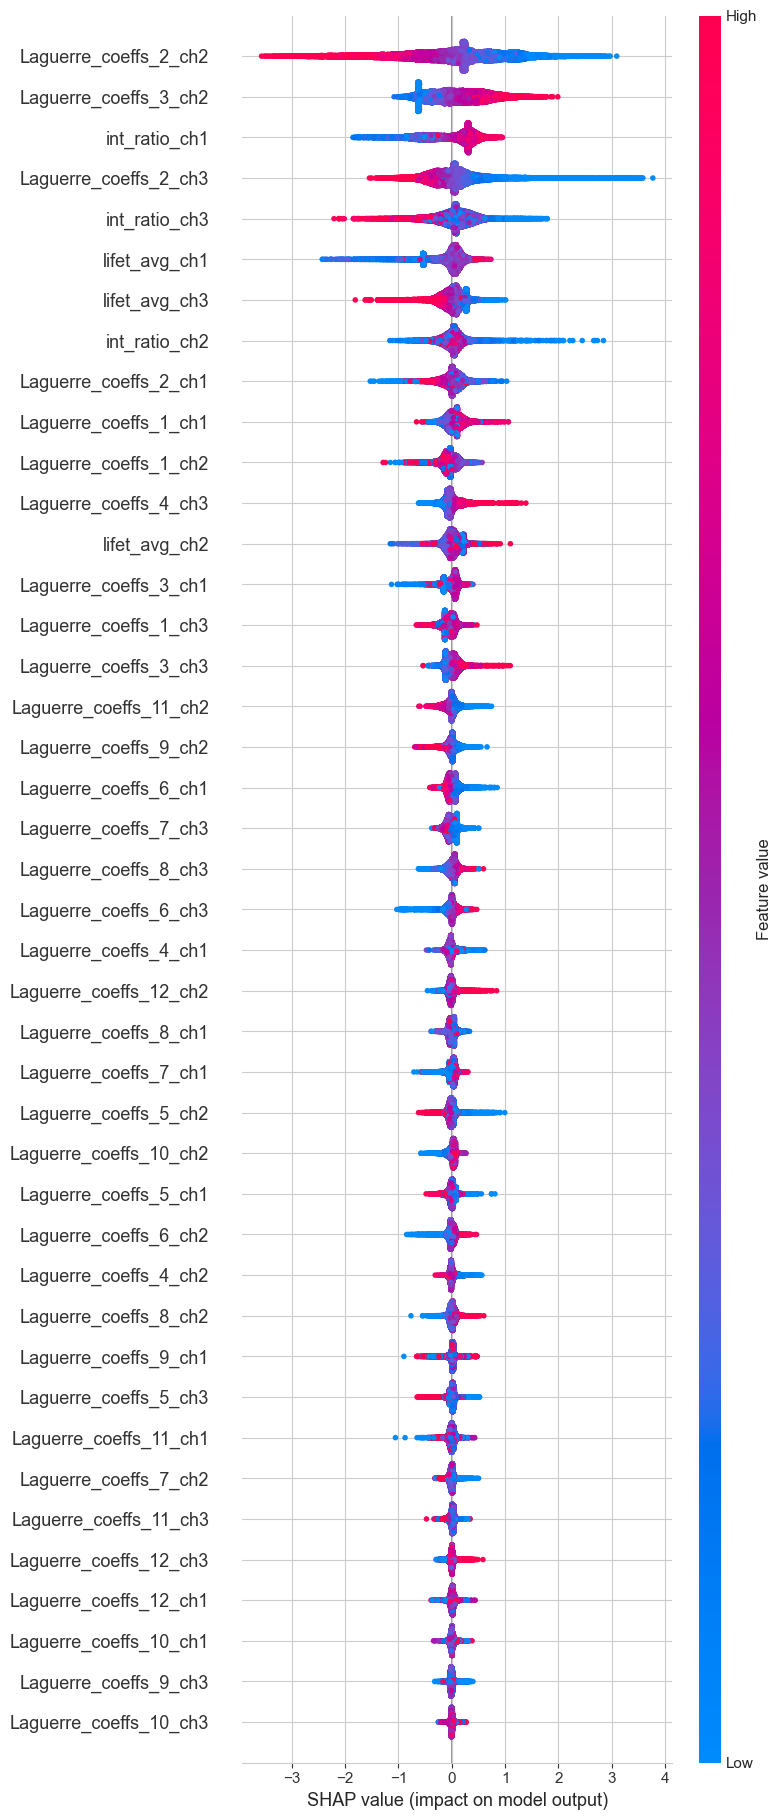

In [45]:
import shap

explainer = shap.Explainer(model)
shap_values_ordered = explainer(X_test_ordered)

shap.summary_plot(shap_values_ordered, X_test_ordered, max_display=len(X_test_ordered.columns))

#make a block diagram with this code (flowchart)
#get model from pkl file, get test data from Hn_p2c table, based on that perform SHAP
#can we perform a shap analysis for each FLIM point or for a group of points (group of points is in p2c table)
#how do we interpret the impact of each FLIM point

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8068270278685973
Precision: 0.8163938753959873
Recall: 0.8501133942684351
F1 Score: 0.8329125004208328


In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 8359  2782]
 [ 2181 12370]]


In [49]:
!pip install lime


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [55]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Impute any missing values

constant_features = [col for col in ordered_columns if X_train[col].std() == 0]
if constant_features:
    X_train_filtered = X_train.drop(columns=constant_features)
    X_test_ordered_filtered = X_test_ordered.drop(columns=constant_features)
else:
    X_train_filtered = X_train
    X_test_ordered_filtered = X_test_ordered
# imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_filtered)
X_test_imputed = imputer.transform(X_test_ordered_filtered)

# Increase kernel width significantly
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_imputed,
    feature_names=[col for col in ordered_columns if col not in constant_features],
    class_names=label_encoder.classes_,
    mode='classification',
    verbose=True,
    kernel_width=10  # Significantly increased kernel width
)
instance_index = 10
# Explain the prediction for a specific instance
exp = explainer.explain_instance(
    data_row=X_test_imputed[instance_index],
    predict_fn=model.predict_proba
)
exp.show_in_notebook(show_all=False)


Intercept 0.42300691824808745
Prediction_local [0.66188077]
Right: 0.91550064


In [56]:
# Choose two similar instances from your test set
instance_index_1 = 22  # Example index
instance_index_2 = 23  # Another example index

# Explain the first prediction using LIME
exp1 = explainer.explain_instance(
    data_row=X_test_imputed[instance_index_1],
    predict_fn=model.predict_proba
)

# Explain the second prediction using LIME
exp2 = explainer.explain_instance(
    data_row=X_test_imputed[instance_index_2],
    predict_fn=model.predict_proba
)

# Display the explanations
exp1.show_in_notebook(show_all=False)
exp2.show_in_notebook(show_all=False)

# Print the explanations for comparison
print("Explanation for instance 1:", exp1.as_list())
print("Explanation for instance 2:", exp2.as_list())


Intercept 0.37845643964274744
Prediction_local [0.82133273]
Right: 0.9571917
Intercept 0.45355229697553806
Prediction_local [0.61009958]
Right: 0.996409


Explanation for instance 1: [('Laguerre_coeffs_2_ch2 <= -0.03', 0.16618639708584737), ('Laguerre_coeffs_2_ch3 <= -0.01', 0.09733176854718746), ('lifet_avg_ch1 > 4.18', 0.0894900055519701), ('int_ratio_ch3 <= 0.19', 0.08913121419971662), ('0.22 < Laguerre_coeffs_3_ch2 <= 0.34', -0.04707332672212141), ('0.28 < Laguerre_coeffs_3_ch1 <= 0.40', 0.04050595851410196), ('0.00 < Laguerre_coeffs_7_ch3 <= 0.01', 0.02777179417271724), ('Laguerre_coeffs_4_ch1 <= -0.03', 0.02763803466057233), ('int_ratio_ch1 > 0.41', -0.026273266524756773), ('Laguerre_coeffs_8_ch1 <= -0.01', -0.021832290241144824)]
Explanation for instance 2: [('Laguerre_coeffs_2_ch2 <= -0.03', 0.16670508710686927), ('lifet_avg_ch3 > 4.71', -0.08648933808109889), ('3.82 < lifet_avg_ch1 <= 4.18', 0.08098038083223409), ('Laguerre_coeffs_2_ch3 <= -0.01', 0.07975248409081544), ('0.34 < int_ratio_ch1 <= 0.41', 0.06414459160613682), ('0.22 < Laguerre_coeffs_3_ch2 <= 0.34', -0.06003297794269015), ('Laguerre_coeffs_6_ch3 <= -0.02', -0.05873